In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
from numpy.random import multivariate_normal as mvnorm
from numpy.linalg import norm

import matplotlib.pyplot as plt
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
plt.rcParams['figure.facecolor'] = 'white'
plt.rcParams['axes.facecolor'] = 'white'
%matplotlib inline

import pdb, time

seed = 0
np.random.seed(seed)

### Import and generate data

In [2]:
# Standardised Fama French 5 to industry portfolio 30
# Import data
data = pd.read_pickle("/Users/sikai/Downloads/ff5_30_standard_4000_draws.pkl")

# # Restrict to 100 time points
X = data[10:110].transpose(2, 1, 0)
X_cov = np.einsum('ijkl,jmkl->imkl', np.expand_dims(X, 1), np.expand_dims(X, 0))

### Train

In [5]:
from regain.covariance import TaylorProxTimeGraphicalLasso, TimeGraphicalLasso
tic = time.perf_counter()
tgl = TaylorProxTimeGraphicalLasso(max_iter=100000, loss='LL', c_level=0.2, rho=1e4, theta=0.5, tol=1e-4, rtol=1e-4, psi="laplacian")
emp_inv_score_tp, baseline_score_tp, fit_score_tp, pre_tp = tgl.fit_cov(X_cov).eval_cov_pre() 
toc = time.perf_counter()
print('Running Time :{}'.format(toc - tic))
min_pre_tp = np.amin(np.abs(pre_tp[pre_tp != 0]))
print(min_pre_tp)

0
60.7794380369573 2.6180339603380443
51025.531805478226
500
15.751655157163375 -2.2892317543629742e-07
49520.66468431938
1000
13.708983999168904 9.183342821085323e-06
48147.796086941074
1500
11.841999140074133 1.4290964448273762e-05
46984.719152396945
2000
9.798567153328294 1.3772436603123616e-05
45803.74860584976
2500
8.081923430408676 3.6883627006689976e-07
44816.98382754487
3000
6.491544204306344 1.5466203850461814e-05
43828.52613834731
3500
5.230432369456836 4.6784496717179433e-07
42957.25471235933
4000
4.39068212174319 1.190284349476132e-05
42089.304013359724
4500
3.5947130694720615 4.493962972917457e-07
41342.31817805067
5000
3.1059362171250977 -4.1039665132267683e-07
40592.792235527195
5500
2.6604483089036974 9.28162704232909e-06
39915.366724706386
6000
2.3340708977170337 8.085720436149319e-06
39265.11726560187
6500
2.0293385027540634 7.62138309626263e-06
38631.0580140874
7000
1.7671033192663494 6.961779301187064e-06
38070.11567446919
7500
1.5432176369176542 7.386120352770379e-

62500
6.085589135507905 4.369974275047142e-09
14831.781109597432
63000
6.243992154442183 3.937332340609376e-09
14748.298499623903
63500
6.40112455448871 4.342478093002359e-09
14666.039671919703
64000
6.556179653210204 3.512334525337522e-09
14584.83449305531
64500
6.7097921163927206 3.453203898563663e-09
14504.88234611634
65000
6.864164561107101 3.524172007922916e-09
14426.070841087338
65500
7.018865383991755 3.3935677581509464e-09
14348.246909055903
66000
7.1695154588813725 3.151140177552996e-09
14271.44604617463
66500
7.319932534100721 3.7103942099235362e-09
14195.63908707533
67000
7.470957710809382 3.5486993356209355e-09
14120.787397466298
67500
7.615105525801464 2.8183770087190877e-09
14047.126527812698
68000
7.760422317206826 3.018535513638121e-09
13974.62158896397
68500
7.912144662597553 2.893746846685217e-09
13902.906615787415
69000
8.06083306286762 3.210830998765758e-09
13832.216610876429
69500
8.205277646630806 2.611455150503365e-09
13762.422489206303
70000
8.345465887466665 2.

/Users/sikai/Dropbox/Research/post_sum/code/regain/regain/covariance/taylor_prox_time_graphical_lasso.py:292: UserWarning: Objective did not converge.
  warnings.warn("Objective did not converge.")


In [ ]:
np.sum([sum(sum(abs(pre_tp[t]) == 0)) for t in range(X_cov.shape[-1])])

In [ ]:
np.sum([sum(sum(abs(pre_tp[t]) < 1e-4)) for t in range(X_cov.shape[-1])])

In [ ]:
from regain.covariance import InequalityTimeGraphicalLasso, TimeGraphicalLasso
res = {}
for i in [1.]:
    tic = time.perf_counter()
    tgl = InequalityTimeGraphicalLasso(max_iter=1000, loss='LL', c_level=0.2, c_prox='cvx', rho=1e2, div=i, tol=1e-8, rtol=1e-8, psi="laplacian")
    res[i] = tgl.fit_cov(X_cov).eval_cov_pre() 
    toc = time.perf_counter()
    print('Running Time :{}'.format(toc - tic))

In [ ]:
from regain.covariance import InequalityTimeGraphicalLasso, TimeGraphicalLasso
tic = time.perf_counter()
tgl = InequalityTimeGraphicalLasso(max_iter=5000, loss='LL', c_level=0.2, c_prox='grad', rho=2e2, theta=0.5, psi="laplacian")
emp_inv_score_grad, baseline_score_grad, fit_score_grad, pre_grad = tgl.fit_cov(X_cov).eval_cov_pre() 
toc = time.perf_counter()
print('Running Time :{}'.format(toc - tic))

In [7]:
from regain.covariance import CVXInequalityTimeGraphicalLasso, TimeGraphicalLasso
pre_cvx = np.load("mosek_sol_ff5_30_standard_alpha_0.2.npy")

In [15]:
from regain.norm import l1_od_norm
from regain.validation import check_norm_prox
psi, prox_psi, psi_node_penalty = check_norm_prox(tgl.psi)

def penalty_objective(Z_0, Z_1, Z_2, psi):
    """Penalty-only objective function for time-varying graphical LASSO."""
    return sum(map(l1_od_norm, Z_0)) + sum(map(psi, Z_2 - Z_1))

pre = {}
fit_score = {}
# for i in [1e-2, 1e-3, 1e-4, 1e-6]:
for i in [min_pre_tp]:
    pre[i] = np.array([k * (np.abs(k) >= i) for k in pre_cvx])
    tgl.precision_ = pre[i]
    emp_inv_score, baseline_score, fit_score[i], _ = tgl.eval_cov_pre() 
    print(penalty_objective(pre[i], pre[i][:-1], pre[i][:1], psi))

ValueError: not enough values to unpack (expected 4, got 2)

In [9]:
tgl = TimeGraphicalLasso(alpha=1., beta=1., mode='admm', rho=1, tol=1e-4,
            rtol=1e-4, psi='laplacian', max_iter=3000, verbose=False, assume_centered=False, 
            return_history=False, update_rho_options=None, compute_objective=True, 
            stop_at=None, stop_when=1e-4, suppress_warn_list=False, init='empirical')
fit_score_, pre_ = tgl.fit_cov(X_cov).eval_cov_pre()   

In [ ]:
np.mean(fit_score_)

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgm"
color_index = 0

idx = 50

ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), tgl.emp_inv[idx].flatten(), color='k', label=r'Empirical Inverse')
for i in [min_pre_tp]:
# for i in [1e-2, 1e-3, 1e-4]:
    ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), pre[i][idx].flatten(), color='r', alpha=0.5, 
            label=r'Constraint TGL SCS, Thres = {}'.format(i))
# for i in [2.]:    
#     ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), res[i][3][idx].flatten(), color='g', alpha=0.5,
#             label=r'Constraint TGL ADMM CVX, Div = {}'.format(i))
ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), pre_grad[idx].flatten(), color='m', alpha=0.5,
        label=r'Constraint TGL ADMM Gradient')
ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), pre_tp[idx].flatten(), color='g', alpha=0.5,
        label=r'Constraint TGL ADMM Linear')
ax.plot(range(X_cov.shape[0] * X_cov.shape[0]), pre_[idx].flatten(), color='y', label=r'Vanilla TGL')


fig.legend(fontsize=15)
ax.set_ylabel('Values', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Entries', fontsize=15)
ax.set_title(r'Precisions at t={} for Empirical Inverse, TGL and Constraint TGL SCS/ADMM'.format(idx), fontsize=20)
plt.tight_layout()
# plt.savefig('pre_{}_{}_{}_admm_relax_taylor.pdf'.format(idx, dim_X, dim_fac))

In [ ]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgm"
color_index = 0

for i in [min_pre_tp]:
# for i in [1e-2, 1e-3, 1e-4]:
    diff = (pre[i] -  pre_cvx).flatten()
    ax.hist(diff, bins=100, color='r', alpha=0.5, 
            label=r'Constraint TGL SCS, Thres = {}'.format(i))
# for i in [2.]:    
#     diff = (res[i][3] -  pre_cvx).flatten()
#     ax.hist(diff, bins=50, color='g', alpha=0.2,
#             label=r'Constraint TGL ADMM CVX, Div = {}'.format(i))
diff = (pre_grad -  pre_cvx).flatten()
ax.hist(diff, bins=100, color='m', alpha=0.2,
        label=r'Constraint TGL ADMM Gradient')
diff = (pre_tp -  pre_cvx).flatten()
ax.hist(diff, bins=100, color='g', alpha=0.2,
        label=r'Constraint TGL ADMM Linear')
# diff = (pre_ -  pre_cvx).flatten()
# ax.hist(diff, bins=100, color='y', alpha=0.5, 
#         label=r'Vanilla TGL')

fig.legend(fontsize=15)
ax.set_ylabel('Counts', fontsize=15)
ax.set_xlabel('Values', fontsize=15)
major_loc = MultipleLocator(base=0.1)
ax.xaxis.set_major_locator(major_loc)
ax.set_xlim((-1, 1))
# ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_title(r'Difference in Precisions for TGL and Constraint TGL SCS/ADMM', fontsize=20)
plt.tight_layout()
# plt.savefig('pre_diff_hist_{}_{}_taylor.pdf'.format(dim_X, dim_fac))

In [ ]:
res[1][0]

100


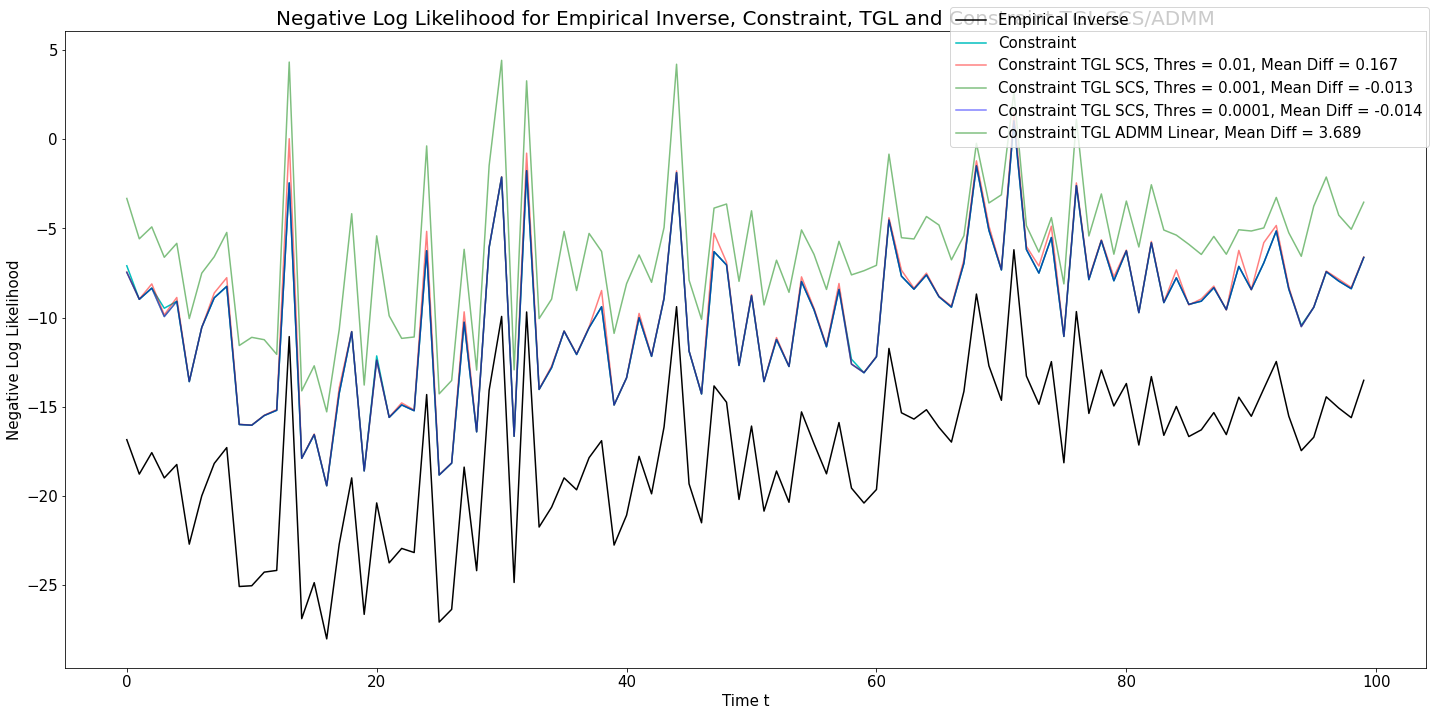

In [11]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20.colors)

ax.plot(range(X_cov.shape[-1]), res[1][0], color='k', label=r'Empirical Inverse')
ax.plot(range(X_cov.shape[-1]), res[1][1], color='c', label=r'Constraint')
# for i in [min_pre_tp]:
for i in [1e-2, 1e-3, 1e-4]:
    mean_diff = np.mean(np.array(fit_score[i]) - baseline_score)
#     ax.plot(range(X_cov.shape[-1]), fit_score[i], color='r', alpha=0.5, 
    ax.plot(range(X_cov.shape[-1]), fit_score[i], color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL SCS, Thres = {}, Mean Diff = {:.3f}'.format(i, mean_diff))
    color_index += 1
# # for i in [2.]:    
# #     mean_diff = np.mean(np.array(res[i][2]) - res[i][1])
# #     ax.plot(range(X_cov.shape[-1]), res[i][2], alpha=0.5, color='g',
# #             label=r'Constraint TGL ADMM CVX, Div = {}, Mean Diff = {:.3f}'.format(i, mean_diff))
# # mean_diff = np.mean(np.array(fit_score_diff) - baseline_score)
# # ax.plot(range(n_time), fit_score_diff, alpha=0.5,
# #         label=r'Constraint TGL ADMM Difference, Mean Diff = {:.3f}'.format(mean_diff))
# mean_diff = np.mean(np.array(fit_score_grad) - baseline_score_grad)
# ax.plot(range(X_cov.shape[-1]), fit_score_grad, alpha=0.5, color='m',
#         label=r'Constraint TGL ADMM Gradient, Mean Diff = {:.3f}'.format(mean_diff))
mean_diff = np.mean(np.array(fit_score_tp) - baseline_score_tp)
print(np.sum((np.array(fit_score_tp) - baseline_score_tp) > 0.01))
ax.plot(range(X_cov.shape[-1]), fit_score_tp, alpha=0.5, color='g',
        label=r'Constraint TGL ADMM Linear, Mean Diff = {:.3f}'.format(mean_diff))
# mean_diff = np.mean(np.array(fit_score_) - res[1][1])
# print(np.sum((np.array(fit_score_) - res[1][1]) > 0.01))
# ax.plot(range(X_cov.shape[-1]), fit_score_, color='y', label=r'Vanilla TGL, Mean Diff = {:.3f}'.format(mean_diff))

fig.legend(fontsize=15)
ax.set_ylabel('Negative Log Likelihood', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Negative Log Likelihood for Empirical Inverse, Constraint, TGL and Constraint TGL SCS/ADMM', fontsize=20)
# ax.set_title(r'Negative Log Likelihood for Empirical Inverse, Constraint, TGL and Constraint TGL SCS', fontsize=20)
plt.tight_layout()
# plt.savefig('diff_like_{}_{}_admm_taylor.pdf'.format(dim_X, dim_fac))
# plt.savefig('diff_like_{}_{}_scs.pdf'.format(dim_X, dim_fac))

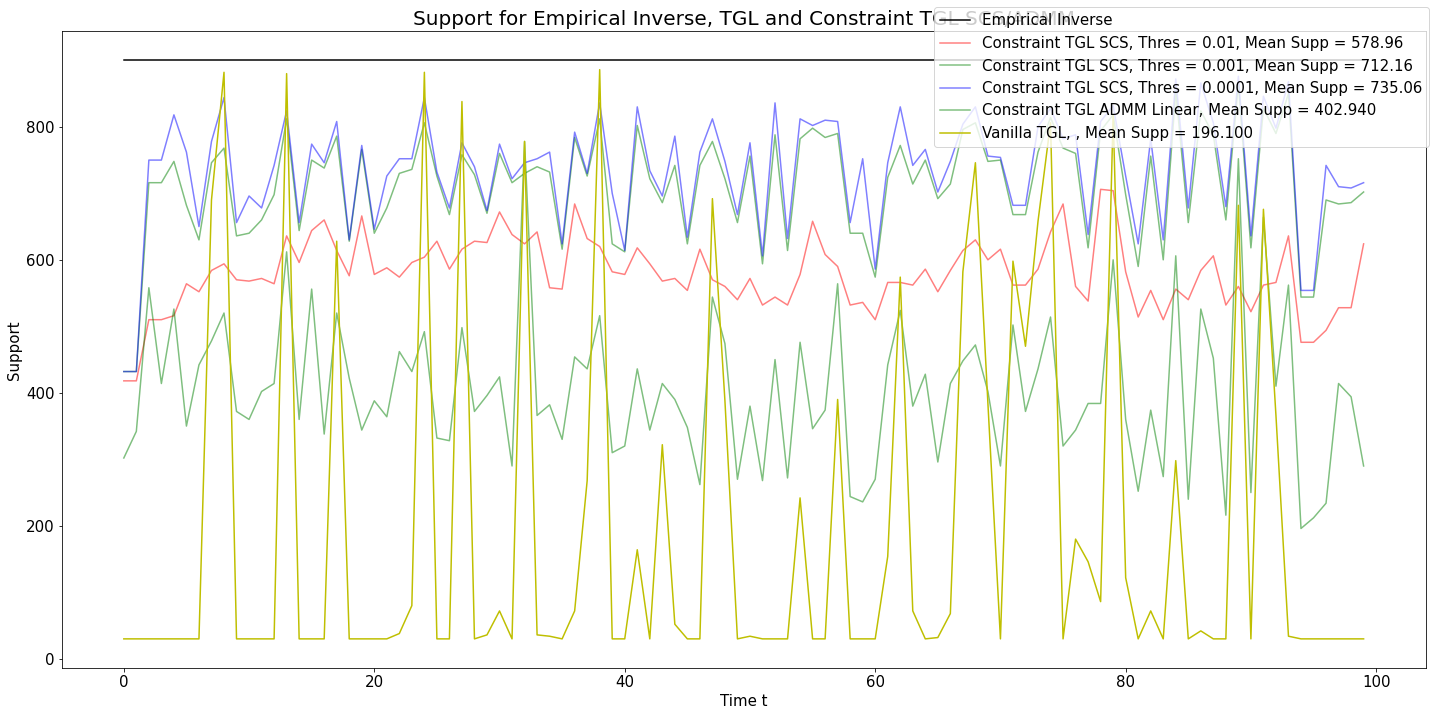

In [13]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0

ax.plot(range(X_cov.shape[-1]), [sum(sum(abs(tgl.emp_inv[k]) > 0)) for k in range(X_cov.shape[-1])], 
        color='k', label=r'Empirical Inverse')
# for i in [min_pre_tp]:
for i in [1e-2, 1e-3, 1e-4]:
    supp = [sum(sum(abs(pre[i][t]) > 0)) for t in range(X_cov.shape[-1])]
    mean_supp = np.mean(supp)
#     ax.plot(range(X_cov.shape[-1]), supp, color='r', alpha=0.5, 
    ax.plot(range(X_cov.shape[-1]), supp, color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL SCS, Thres = {}, Mean Supp = {}'.format(i, mean_supp))
    color_index += 1
# # for i in [2.]:    
# #     supp = [sum(sum(abs(res[i][3][t]) > 0)) for t in range(X_cov.shape[-1])]
# #     mean_supp = np.mean(supp)
# #     ax.plot(range(X_cov.shape[-1]), supp, color='g', alpha=0.5,
# #             label=r'Constraint TGL ADMM CVX, Div = {}, Mean Supp = {:.3f}'.format(i, mean_supp))
# supp = [sum(sum(abs(pre_grad[t]) > 0)) for t in range(X_cov.shape[-1])]
# ax.plot(range(X_cov.shape[-1]), supp, color='m', alpha=0.5,
#         label=r'Constraint TGL ADMM Gradient, Mean Supp = {:.3f}'.format(np.mean(supp)))
supp = [sum(sum(abs(pre_tp[t]) > 0)) for t in range(X_cov.shape[-1])]
ax.plot(range(X_cov.shape[-1]), supp, color='g', alpha=0.5,
        label=r'Constraint TGL ADMM Linear, Mean Supp = {:.3f}'.format(np.mean(supp)))
supp = [sum(sum(abs(pre_[t]) > 0)) for t in range(X_cov.shape[-1])]
ax.plot(range(X_cov.shape[-1]), [sum(sum(abs(pre_[k]) > 0)) for k in range(X_cov.shape[-1])], 
        color='y', label=r'Vanilla TGL, , Mean Supp = {:.3f}'.format(np.mean(supp)))


fig.legend(fontsize=15)
ax.set_ylabel('Support', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Support for Empirical Inverse, TGL and Constraint TGL SCS/ADMM', fontsize=20)
# ax.set_title(r'Support for Empirical Inverse, TGL and Constraint TGL SCS', fontsize=20)
plt.tight_layout()
# plt.savefig('diff_supp_{}_{}_admm_taylor.pdf'.format(dim_X, dim_fac))
# plt.savefig('diff_supp_{}_{}_scs.pdf'.format(dim_X, dim_fac))

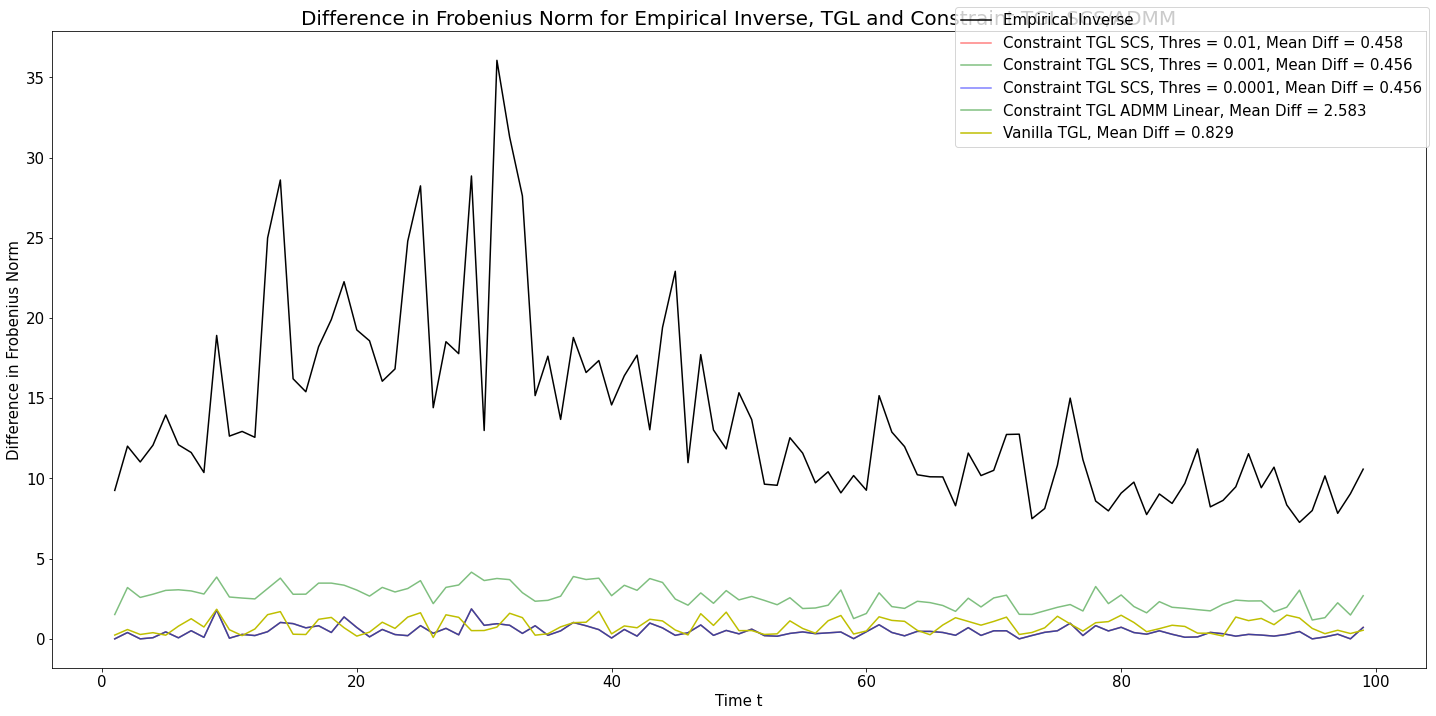

In [14]:
fig, ax = plt.subplots(figsize=(20, 10))
fig.patch.set_facecolor('white')
colors = "rgb"
color_index = 0

diff_emp = [norm(tgl.emp_inv[t] - tgl.emp_inv[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), np.array(diff_emp), alpha=1, color='k', label=r'Empirical Inverse')
# for i in [min_pre_tp]:
for i in [1e-2, 1e-3, 1e-4]:
    diff = [norm(pre[i][t] - pre[i][t-1], 'fro') for t in range(1, X_cov.shape[-1])]
    mean_diff = np.mean(diff)
#     ax.plot(range(1, X_cov.shape[-1]), diff, color='r', alpha=0.5, 
    ax.plot(range(1, X_cov.shape[-1]), diff, color=colors[color_index], alpha=0.5, 
            label=r'Constraint TGL SCS, Thres = {}, Mean Diff = {:.3f}'.format(i, mean_diff))
    color_index += 1
# # for i in [2.]:    
# #     diff_cvx = [norm(res[i][3][t] - res[i][3][t-1], 'fro') for t in range(1, X_cov.shape[-1])]
# #     ax.plot(range(1, X_cov.shape[-1]), diff_cvx, color='g', alpha=0.5,
# #             label=r'Constraint TGL ADMM CVX, Div = {}, Mean Diff = {:.3f}'.format(i, np.mean(diff_cvx)))
# diff_grad = [norm(pre_grad[t] - pre_grad[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
# ax.plot(range(1, X_cov.shape[-1]), diff_grad, color='m', alpha=0.5,
#         label=r'Constraint TGL ADMM Gradient, Mean Diff = {:.3f}'.format(np.mean(diff_grad)))
diff_grad = [norm(pre_tp[t] - pre_tp[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), diff_grad, color='g', alpha=0.5,
        label=r'Constraint TGL ADMM Linear, Mean Diff = {:.3f}'.format(np.mean(diff_grad)))
diff_fit_ = [norm(pre_[t] - pre_[t-1], 'fro') for t in range(1, X_cov.shape[-1])]
ax.plot(range(1, X_cov.shape[-1]), np.array(diff_fit_), color='y', alpha=1, 
        label=r'Vanilla TGL, Mean Diff = {:.3f}'.format(np.mean(diff_fit_)))

        
fig.legend(fontsize=15)
ax.set_ylabel('Difference in Frobenius Norm', fontsize=15)
ax.tick_params(axis='both', which='major', labelsize=15)
ax.set_xlabel('Time t', fontsize=15)
ax.set_title(r'Difference in Frobenius Norm for Empirical Inverse, TGL and Constraint TGL SCS/ADMM', fontsize=20)
# ax.set_title(r'Difference in Frobenius Norm for Empirical Inverse, TGL and Constraint TGL SCS', fontsize=20)
plt.tight_layout()
# plt.savefig('diff_fro_{}_{}_admm_taylor.pdf'.format(dim_X, dim_fac))
# plt.savefig('diff_fro_{}_{}_scs.pdf'.format(dim_X, dim_fac))